Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

In [1]:
# импортируем необходимые бибилиотеки
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt

#импортируем исходные таблицы
calls_data = pd.read_csv('-')
messages_data = pd.read_csv('-')
internet_data = pd.read_csv('-')
tarrifs_data = pd.read_csv('-')
users_data = pd.read_csv('-')

In [2]:
# знакомимся с данными таблицы calls.csv
display(calls_data.head())
calls_data.info()
#методом to_datetime() переводит строки в даты в столбце calls_data['call_date']
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d %H:%M')
#добавляем столбец месяца
calls_data['month'] = calls_data['call_date'].dt.month
display(calls_data.head())
print('Количество дубликатов', calls_data.duplicated().sum())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Количество дубликатов 0


In [3]:
# знакомимся с данными таблицы messages.csv
display(messages_data.head())
messages_data.info()
#методом to_datetime() переводит строки в даты в столбце messages_data['message_date']
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d %H:%M')
#добавляем столбец месяца
messages_data['month'] = messages_data['message_date'].dt.month
display(messages_data.head())
print('Количество дубликатов', messages_data.duplicated().sum())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Количество дубликатов 0


In [4]:
# знакомимся с данными таблицы internet.csv
display(internet_data.head())
internet_data.info()
#методом to_datetime() переводит строки в даты в столбце internet_data['session_date']
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d %H:%M')
#добавляем столбец месяца
internet_data['month'] = internet_data['session_date'].dt.month
display(internet_data.head())
print('Количество дубликатов', internet_data.duplicated().sum())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


Количество дубликатов 0


In [5]:
# знакомимся с данными таблицы tariffs.csv
display(tarrifs_data.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
# знакомимся с данными таблицы users.csv
display(users_data.head())
users_data.info()
#методом to_datetime() переводит строки в даты в столбце users_data['reg_date'] и ['churn_date']
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d %H:%M')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d %H:%M')
#добавляем столбец месяца регистрации
users_data['month'] = users_data['reg_date'].dt.month
#добавляем столбец месяца завершения регистрации
users_data['month_churn'] = users_data['churn_date'].dt.month
display(users_data.head())
print(users_data['tariff'].value_counts())
print('Количество дубликатов', users_data.duplicated().sum())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,month_churn
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,NaN
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,NaN
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,NaN
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,NaN


smart    351
ultra    149
Name: tariff, dtype: int64
Количество дубликатов 0


### Вывод
Таблицы содержат необходимую информацию о звонках, сообщениях, интернет-сессиях 500 клиентов по двум тарифам. 351 клиент использует тариф smart, 149 клиентов использует тариф ultra. В исходных таблицах имеется информация для идентификации клиентов. Также имеется информация об условиях тарифов и отдельная таблица о клиентах с указанием тарифа, возраста и города регистрации, даты начала использования тарифа и дата окончания использования тарифа. Информация не содержит пропусков и явных дубликатов.

Информация достаточна для дальнейшего анализа. Выполнено форматирование информации о датах в таблицах calls_data, messages_data, internet_data и users_data. Для дальнейшего анализа добавлен столбец месяца для каждой записи в указанных таблицах.

## Анализ данных

In [7]:
#строим сводную таблицу по клиентам по количеству сделанных звонков по месяцам
pivot_calls_1 = calls_data.pivot_table(index='user_id', columns='month', values='duration', aggfunc = 'count')
#индексируем таблицу
pivot_calls_1.reset_index(inplace=True)
#переименовываем столбцы
pivot_calls_1.columns = ['user_id','1','2','3','4','5','6','7','8','9','10','11','12']
display(pivot_calls_1.head())

#добавляем сведения о клиенте
calls_c = users_data.merge(pivot_calls_1, on='user_id', how='left')
#удаляем лишние столбцы
calls_c = calls_c.drop(['age','churn_date','city','first_name','last_name','reg_date'], axis=1)

#считаем среднее количество звонков по клиентам в месяц
for index in range(len(calls_c)):
    calls_c.loc[index,'mean'] = calls_c.loc[index,'1':'12'].mean()
display(calls_c.head())

#строим сводную таблицу по количеству месячных звонков для клиентов разных тарифов
calls_pivot = round(calls_c.pivot_table(index='tariff', values='mean'))
display(calls_pivot.head())

,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
2,1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
4,1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0


,user_id,tariff,month,month_churn,1,2,3,4,5,6,7,8,9,10,11,12,mean
0,1000,ultra,5,NaN,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0,46.0
1,1001,smart,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0,61.0
2,1002,smart,6,NaN,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0,31.0
3,1003,ultra,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0,104.0
4,1004,ultra,5,NaN,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0,22.0


,mean
tariff,
smart,59.0
ultra,76.0


In [8]:
#округляем значения столбца calls_data['duration'] вверх
for index in range(len(calls_data)):
    calls_data.loc[index,'duration'] = mt.ceil(calls_data.loc[index,'duration'])
display(calls_data.head())
#строим сводную таблицу по клиентам по количеству израсходованных минут по месяцам
pivot_calls_2 = round(calls_data.pivot_table(index='user_id', columns='month', values='duration', aggfunc = 'sum'))
#индексируем таблицу
pivot_calls_2.reset_index(inplace=True)
#переименовываем столбцы
pivot_calls_2.columns = ['user_id','1','2','3','4','5','6','7','8','9','10','11','12']
#добавляем сведения о клиенте
calls = users_data.merge(pivot_calls_2, on='user_id', how='left')
#удаляем лишние столбцы
calls = calls.drop(['age','churn_date','city','first_name','last_name','reg_date'], axis=1)

#считаем среднее количество израсходованных минут по клиентам в месяц
for index in range(len(calls)):
    calls.loc[index,'mean'] = calls.loc[index,'1':'12'].mean()
display(calls.head())

#строим сводную таблицу по количеству израсходованных минут по клиентам разных тарифов в месяц
calls_pivot_1 = round(calls.pivot_table(index='tariff', values='mean'))
display(calls_pivot_1)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


,user_id,tariff,month,month_churn,1,2,3,4,5,6,7,8,9,10,11,12,mean
0,1000,ultra,5,NaN,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,320.750000
1,1001,smart,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0,422.000000
2,1002,smart,6,NaN,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0,216.714286
3,1003,ultra,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0,764.400000
4,1004,ultra,5,NaN,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0,123.375000


,mean
tariff,
smart,421.0
ultra,547.0


In [9]:
calls = calls.drop(axis=1, columns='mean')
#описываем цикл для расчета выручки от звонков свыше лимита, установленного тарифом
for column in ['1','2','3','4','5','6','7','8','9','10','11','12']:
    for index in range(len(calls)):
        if calls.loc[index,'tariff'] == 'smart' and calls.loc[index,column] > tarrifs_data.loc[0,'minutes_included']:
            calls.loc[index,column] = (calls.loc[index,column] - tarrifs_data.loc[0,'minutes_included'])*tarrifs_data.loc[0,'rub_per_minute']
        elif calls.loc[index,'tariff'] == 'ultra' and calls.loc[index,column] > tarrifs_data.loc[1,'minutes_included']:
            calls.loc[index,column] = (calls.loc[index,column] - tarrifs_data.loc[1,'minutes_included'])*tarrifs_data.loc[1,'rub_per_minute']    
        else:
            calls.loc[index,column] = 0
display(calls.head())

,user_id,tariff,month,month_churn,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,11,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002,smart,6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003,ultra,8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,ultra,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#строим сводную таблицу по клиентам по количеству отправленных сообщений по месяцам
pivot_calls_3 = messages_data.pivot_table(index='user_id', columns='month', values='id', aggfunc = 'count')
#индексируем таблицу
pivot_calls_3.reset_index(inplace=True)
#переименовываем столбцы
pivot_calls_3.columns = ['user_id','1','2','3','4','5','6','7','8','9','10','11','12']
#добавляем сведения о клиенте
messages = users_data.merge(pivot_calls_3, on='user_id', how='left')
#удаляем лишние столбцы
messages = messages.drop(['age','churn_date','city','first_name','last_name','reg_date'], axis=1)

#считаем среднее количество сообщений по клиентам в месяц
for index in range(len(messages)):
    messages.loc[index,'mean'] = messages.loc[index,'1':'12'].mean()
display(messages.head())
    
#строим сводную таблицу по количеству сообщений по клиентам разных тарифов в месяц
messages_pivot_1 = round(messages.pivot_table(index='tariff', values='mean'))
display(messages_pivot_1)

,user_id,tariff,month,month_churn,1,2,3,4,5,6,7,8,9,10,11,12,mean
0,1000,ultra,5,NaN,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,62.0
1,1001,smart,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,smart,6,NaN,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0,10.0
3,1003,ultra,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0,76.0
4,1004,ultra,5,NaN,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,149.0


,mean
tariff,
smart,38.0
ultra,65.0


In [11]:
messages = messages.drop(['mean'], axis=1)
#описываем цикл для расчета выручки от сообщений свыше лимита, установленного тарифом
for column in ['1','2','3','4','5','6','7','8','9','10','11','12']:
    for index in range(len(messages)):
        if messages.loc[index,'tariff'] == 'smart' and messages.loc[index,column] > tarrifs_data.loc[0,'messages_included']:
            messages.loc[index,column] = (messages.loc[index,column] - tarrifs_data.loc[0,'messages_included'])*tarrifs_data.loc[0,'rub_per_message']
        elif messages.loc[index,'tariff'] == 'ultra' and messages.loc[index,column] > tarrifs_data.loc[1,'messages_included']:
            messages.loc[index,column] = (messages.loc[index,column] - tarrifs_data.loc[1,'messages_included'])*tarrifs_data.loc[1,'rub_per_message']    
        else:
            messages.loc[index,column] = 0
display(messages.head())

,user_id,tariff,month,month_churn,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,11,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002,smart,6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003,ultra,8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,ultra,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#строим сводную таблицу по клиентам по объему израсходованного интернет-трафика по месяцам
pivot_calls_4 = round(internet_data.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc = 'sum'))
#индексируем таблицу
pivot_calls_4.reset_index(inplace=True)
#переименовываем столбцы
pivot_calls_4.columns = ['user_id','1','2','3','4','5','6','7','8','9','10','11','12']
#добавляем сведения о клиенте
internet = users_data.merge(pivot_calls_4, on='user_id', how='left')
#удаляем лишние столбцы
internet = internet.drop(['age','churn_date','city','first_name','last_name','reg_date'], axis=1)

#считаем среднее количество израсходованного интернет-трафика по клиентам в месяц
for index in range(len(internet)):
    internet.loc[index,'mean'] = internet.loc[index,'1':'12'].mean()
display(internet.head())

#строим сводную таблицу по количеству израсходованного интернет-трафика по клиентам разных тарифов в месяц
internet_pivot_1 = round(internet.pivot_table(index='tariff', values='mean'))
display(internet_pivot_1)

,user_id,tariff,month,month_churn,1,2,3,4,5,6,7,8,9,10,11,12,mean
0,1000,ultra,5,NaN,NaN,NaN,NaN,NaN,2253.0,23234.0,14004.0,14056.0,14569.0,14702.0,14756.0,9818.0,13424.000000
1,1001,smart,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.0,14037.0,16233.000000
2,1002,smart,6,NaN,NaN,NaN,NaN,NaN,NaN,10857.0,17580.0,20319.0,16691.0,13888.0,18587.0,18114.0,16576.571429
3,1003,ultra,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.0,12469.0,14768.0,11357.0,10122.0,11456.200000
4,1004,ultra,5,NaN,NaN,NaN,NaN,NaN,13404.0,17600.0,22230.0,28584.0,15109.0,18475.0,15616.0,18021.0,18629.875000


,mean
tariff,
smart,16190.0
ultra,19727.0


In [13]:
internet = internet.drop(['mean'], axis=1)
#описываем цикл для расчета выручки от трафика свыше лимита, установленного тарифом
for column in ['1','2','3','4','5','6','7','8','9','10','11','12']:
    for index in range(len(internet)):
        if internet.loc[index,'tariff'] == 'smart' and internet.loc[index,column] > tarrifs_data.loc[0,'mb_per_month_included']:
            internet.loc[index,column] = mt.ceil((internet.loc[index,column] - tarrifs_data.loc[0,'mb_per_month_included'])/1000)*tarrifs_data.loc[0,'rub_per_gb']
        elif internet.loc[index,'tariff'] == 'ultra' and internet.loc[index,column] > tarrifs_data.loc[1,'mb_per_month_included']:
            internet.loc[index,column] = mt.ceil((internet.loc[index,column] - tarrifs_data.loc[1,'mb_per_month_included'])/1000)*tarrifs_data.loc[1,'rub_per_gb']    
        else:
            internet.loc[index,column] = 0
display(internet.head())

,user_id,tariff,month,month_churn,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,11,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800.0,0.0
2,1002,smart,6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
3,1003,ultra,8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,ultra,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#строим таблицу для расчета помесячной выручки для клиента
all_data = pd.DataFrame(columns=['user_id','tariff','1','2','3','4','5','6','7','8','9','10','11','12'])
all_data['user_id'] = users_data['user_id']
all_data['tariff'] = users_data['tariff']
all_data['month'] = users_data['month']
all_data['month_churn'] = users_data['month_churn']
all_data['month_churn'] = all_data['month_churn'].fillna(12)

#описываем цикл для расчета выручки от всех видов связи, в связи с превышением предусмотренных тарифом объемов
for column in ['1','2','3','4','5','6','7','8','9','10','11','12']:
    for index in range(len(all_data)):
        all_data.loc[index,column] = calls.loc[index,column]+messages.loc[index,column]+internet.loc[index,column]

#описываем цикл для расчета выручки от стоимости тарифного плана 
for column in ['1','2','3','4','5','6','7','8','9','10','11','12']:
    for index in range(len(all_data)):
        if all_data.loc[index,'tariff'] == 'smart' and all_data.loc[index,'month'] <= pd.to_numeric(column) <= all_data.loc[index,'month_churn']:
            all_data.loc[index,column] = all_data.loc[index,column] + tarrifs_data.loc[0,'rub_monthly_fee']
        elif all_data.loc[index,'tariff'] == 'ultra' and all_data.loc[index,'month'] <= pd.to_numeric(column) <= all_data.loc[index,'month_churn']:
            all_data.loc[index,column] = all_data.loc[index,column] + tarrifs_data.loc[1,'rub_monthly_fee']
display(all_data.head())

#описываем цикл для расчета среднего значения помесячной выручки
for index in range(len(all_data)):
    all_data.loc[index,'mean'] = all_data.loc[index,'1':'12'].sum()/(all_data.loc[index,'month_churn']-all_data.loc[index,'month']+1)
display(all_data.head())

#строим сводную таблицу среднего значения помесячной выручки по клиентам разных тарифов в месяц
all_data_pivot = round(all_data.pivot_table(index='tariff', values='mean', aggfunc=['mean','median']))
all_data_pivot.columns = ['mean','median']
display(all_data_pivot.head())

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,month,month_churn
0,1000,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,5,12.0
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1350.0,550.0,11,12.0
2,1002,smart,0.0,0.0,0.0,0.0,0.0,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0,6,12.0
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,8,12.0
4,1004,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,5,12.0


,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,month,month_churn,mean
0,1000,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,5,12.0,1950.000000
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1350.0,550.0,11,12.0,950.000000
2,1002,smart,0.0,0.0,0.0,0.0,0.0,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0,6,12.0,1035.714286
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,8,12.0,1950.000000
4,1004,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,5,12.0,1950.000000


,mean,median
tariff,,
smart,1335.0,1190.0
ultra,2089.0,1950.0


### Вывод
1. Среднее месячное количество звонков пользователя тарифа smart 59, пользователя тарифа ultra 76 звонков.
2. Среднее месячное количество израсходованных на звонки минут пользователя тарифа smart 421, пользователя тарифа ultra 547 минут.
3. Среднее месячное количество отправленных сообщений пользователя тарифа smart 38, пользователя тарифа ultra 65 сообщений.
4. Среднее месячное количество мегабайт интернет-трафика пользователя тарифа smart 16190, пользователя тарифа ultra 19727 мегабайт.
5. Средняя месячная выручка пользователя тарифа smart 1335 рублей, пользователя тарифа ultra 2089 рублей.
6. Медианная месячная выручка пользователя тарифа smart 1151 рублей, пользователя тарифа ultra 1950 рублей.

Пользователям обоих тарифов достаточно предусмотренных тарифами предоплаченных минут и сообщений, превышения очень редкие.

Пользователи тарифа smart не укладываются в предусмотренный тарифом предел интернет-трафика, поэтому для пользователей этого тарифа значительно возрастает сумма общего платежа по сравнению с установленной тарифом суммой. Средний платеж 1335 руб. против 550 руб. предусмотренных тарифом. 

Пользователям тарифа ultra достаточно предусмотренного тарифом интернет-трафика, среднее значение по тарифу значительно ниже предусмотренного, 19727 мб против 30720 мб. По этой причине средний платеж пользователя тарифа ultra, равный 2089 руб. незначительно выше предусмотренных тарифом 1950 руб.

## Анализ данных

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,month,month_churn,mean,city,city_category
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1350.0,550.0,11,12.0,950.000000,Москва,mosc
2,1002,smart,0.0,0.0,0.0,0.0,0.0,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0,6,12.0,1035.714286,Стерлитамак,other
5,1005,smart,550.0,550.0,886.0,1186.0,835.0,886.0,775.0,949.0,556.0,1219.0,694.0,838.0,1,12.0,827.000000,Набережные Челны,other
6,1006,smart,0.0,550.0,950.0,550.0,550.0,550.0,1550.0,1350.0,750.0,1550.0,550.0,1350.0,2,12.0,931.818182,Ульяновск,other
7,1007,smart,0.0,0.0,0.0,550.0,1150.0,685.0,981.0,1750.0,1015.0,550.0,1190.0,550.0,4,12.0,935.666667,Москва,mosc


379127.26715773746
615.7331135790388


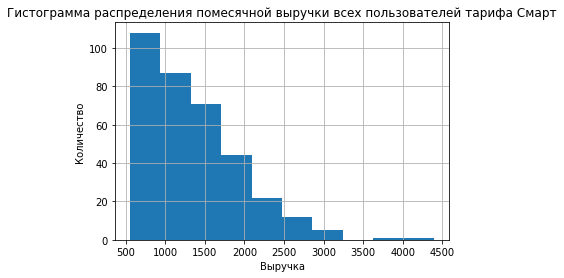

In [15]:
all_data['city'] = users_data['city']
#создаем функцию, которая проводит категоризацию города проживания пользователя
def city_category(city):
    if city == 'Москва':
        return 'mosc'
    else:
        return 'other'
#применение функции методом apply() к данным из all_data['city'] и внесение итогового результата в столбец
#all_data['city_category']
all_data['city_category'] = all_data['city'].apply(city_category)

#выбираем отдельную таблицу пользователей тарифа smart
all_data_smart = all_data.query('tariff == "smart"')

display(all_data_smart.head())
#рассчитываем вариацию для выборки
variance = np.var(all_data_smart['mean'])
print(variance)
#рассчитываем стандартное отклонение для выборки
standard_deviation = np.sqrt(variance)
print(standard_deviation)
#строим гистограмму распределения
all_data_smart['mean'].hist()
plt.title("Гистограмма распределения помесячной выручки всех пользователей тарифа Смарт")
plt.xlabel("Выручка")
plt.ylabel("Количество")
plt.show()

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,month,month_churn,mean,city,city_category
0,1000,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,5,12.0,1950.0,Краснодар,other
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,8,12.0,1950.0,Москва,mosc
4,1004,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,5,12.0,1950.0,Новокузнецк,other
13,1013,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,11,12.0,1950.0,Иваново,other
16,1016,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,11,12.0,1950.0,Омск,other


93136.47475946049
305.1826907926799


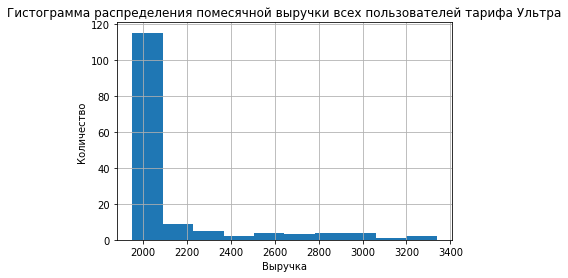

In [16]:
#выбираем отдельную таблицу пользователей тарифа ultra
all_data_ultra = all_data.query('tariff == "ultra"')

display(all_data_ultra.head())
#рассчитываем вариацию для выборки
variance = np.var(all_data_ultra['mean'])
print(variance)
#рассчитываем стандартное отклонение для выборки
standard_deviation = np.sqrt(variance)
print(standard_deviation)
#строим гистограмму распределения
all_data_ultra['mean'].hist()
plt.title("Гистограмма распределения помесячной выручки всех пользователей тарифа Ультра")
plt.xlabel("Выручка")
plt.ylabel("Количество")
plt.show()

### Вывод

Средняя месячная выручка пользователя тарифа smart 1335 рублей. Дисперсия для выборки тарифа smart составляет 379127, стандартное отклонение 615. Таким образом, значения средней выручки пользователя тарифа smart вхоодят в диапазон от 550 до 2395 рублей. Гистограмма, построенная по данному датасету скошена вправо, медианная месячная выручка меньше среднего значения месячной выручки.

Средняя месячная выручка пользователя тарифа ultra 2089 рублей. Дисперсия для выборки тарифа ultra составляет 93136, стандартное отклонение 305. Таким образом, значения средней выручки пользователя тарифа ultra вхоодят в диапазон от 1950 до 2965 рублей. Гистограмма, построенная по данному датасету скошена вправо, медианная месячная выручка меньше среднего значения месячной выручки.

## Проверка гипотез

,mean
city_category,
mosc,1242.0
other,1357.0


,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,month,month_churn,mean,city,city_category
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1350.0,550.0,11,12.0,950.000000,Москва,mosc
7,1007,smart,0.0,0.0,0.0,550.0,1150.0,685.0,981.0,1750.0,1015.0,550.0,1190.0,550.0,4,12.0,935.666667,Москва,mosc
31,1031,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1045.0,736.0,11,12.0,890.500000,Москва,mosc
33,1033,smart,0.0,0.0,0.0,0.0,0.0,0.0,550.0,2031.0,2831.0,1640.0,2616.0,1816.0,7,12.0,1914.000000,Москва,mosc
38,1038,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,950.0,550.0,950.0,10,12.0,816.666667,Москва,mosc


302562.3461504841
550.0566753985303


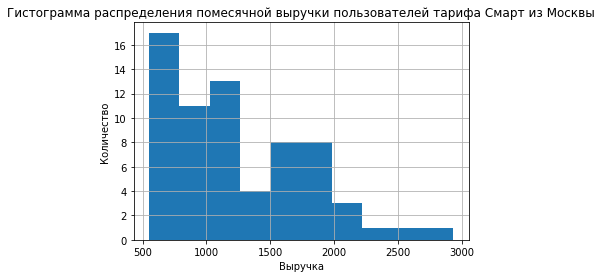

In [17]:
#строим сводную таблицу среднего значения помесячной выручки для пользователей тарифа smart из Москвы и остальных городов
all_data_smart_pivot = round(all_data_smart.pivot_table(index='city_category', values='mean'))
display(all_data_smart_pivot.head())

#выбираем отдельную таблицу пользователей тарифа smart из Москвы
all_data_s_mosc = all_data_smart.query('city_category == "mosc"')
display(all_data_s_mosc.head())

#рассчитываем вариацию для выборки
variance = np.var(all_data_s_mosc['mean'])
print(variance)
#рассчитываем стандартное отклонение для выборки
standard_deviation = np.sqrt(variance)
print(standard_deviation)
#строим гистограмму распределения
all_data_s_mosc['mean'].hist()
plt.title("Гистограмма распределения помесячной выручки пользователей тарифа Смарт из Москвы")
plt.xlabel("Выручка")
plt.ylabel("Количество")
plt.show()

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,month,month_churn,mean,city,city_category
2,1002,smart,0.0,0.0,0.0,0.0,0.0,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0,6,12.0,1035.714286,Стерлитамак,other
5,1005,smart,550.0,550.0,886.0,1186.0,835.0,886.0,775.0,949.0,556.0,1219.0,694.0,838.0,1,12.0,827.000000,Набережные Челны,other
6,1006,smart,0.0,550.0,950.0,550.0,550.0,550.0,1550.0,1350.0,750.0,1550.0,550.0,1350.0,2,12.0,931.818182,Ульяновск,other
8,1008,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568.0,12,12.0,568.000000,Челябинск,other
9,1009,smart,0.0,0.0,550.0,550.0,550.0,750.0,2550.0,2350.0,1950.0,1550.0,950.0,1350.0,3,12.0,1310.000000,Пермь,other


394668.4901806868
628.2264640881398


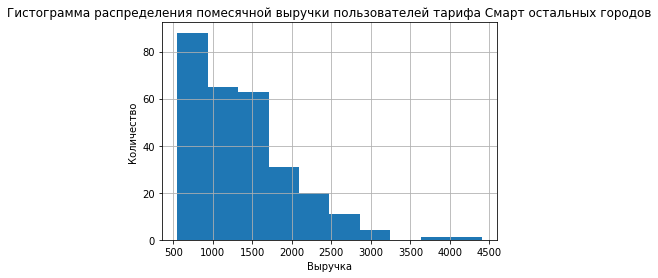

In [18]:
#выбираем отдельную таблицу пользователей тарифа smart из других городов
all_data_s_other = all_data_smart.query('city_category == "other"')
display(all_data_s_other.head())
#рассчитываем вариацию для выборки
variance = np.var(all_data_s_other['mean'])
print(variance)
#рассчитываем стандартное отклонение для выборки
standard_deviation = np.sqrt(variance)
print(standard_deviation)
#строим гистограмму распределения
all_data_s_other['mean'].hist()
plt.title("Гистограмма распределения помесячной выручки пользователей тарифа Смарт остальных городов")
plt.xlabel("Выручка")
plt.ylabel("Количество")
plt.show()

,mean
city_category,
mosc,2061.0
other,2096.0


,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,month,month_churn,mean,city,city_category
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,8,12.0,1950.0,Москва,mosc
49,1049,ultra,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,3,12.0,1950.0,Москва,mosc
57,1057,ultra,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,3,12.0,1950.0,Москва,mosc
80,1080,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,8,12.0,1950.0,Москва,mosc
81,1081,ultra,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,3,12.0,1950.0,Москва,mosc


40193.89686492251
200.48415614437593


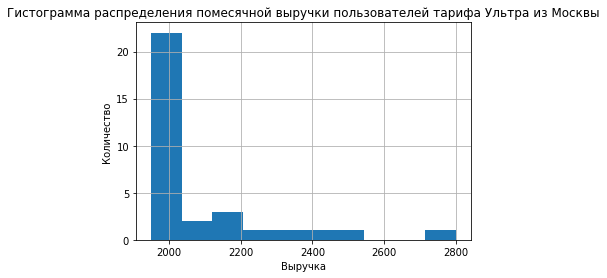

In [19]:
#строим сводную таблицу среднего значения помесячной выручки для пользователей тарифа ultra из Москвы и остальных городов
all_data_ultra_pivot = round(all_data_ultra.pivot_table(index='city_category', values='mean'))
display(all_data_ultra_pivot.head())

#выбираем отдельную таблицу пользователей тарифа ultra из Москвы
all_data_u_mosc = all_data_ultra.query('city_category == "mosc"')
display(all_data_u_mosc.head())
#рассчитываем вариацию для выборки
variance = np.var(all_data_u_mosc['mean'])
print(variance)
#рассчитываем стандартное отклонение для выборки
standard_deviation = np.sqrt(variance)
print(standard_deviation)
#строим гистограмму распределения
all_data_u_mosc['mean'].hist()
plt.title("Гистограмма распределения помесячной выручки пользователей тарифа Ультра из Москвы")
plt.xlabel("Выручка")
plt.ylabel("Количество")
plt.show()

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,month,month_churn,mean,city,city_category
0,1000,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,5,12.0,1950.0,Краснодар,other
4,1004,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,5,12.0,1950.0,Новокузнецк,other
13,1013,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,11,12.0,1950.0,Иваново,other
16,1016,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,11,12.0,1950.0,Омск,other
18,1018,ultra,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,4,12.0,1950.0,Уфа,other


107342.28346037313
327.6313224653179


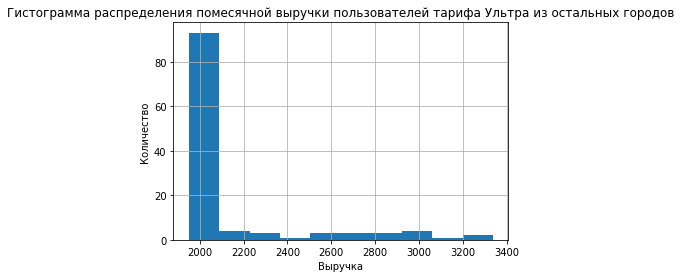

In [20]:
#выбираем отдельную таблицу пользователей тарифа ultra из Москвы
all_data_u_other = all_data_ultra.query('city_category == "other"')
display(all_data_u_other.head())
#рассчитываем вариацию для выборки
variance = np.var(all_data_u_other['mean'])
print(variance)
#рассчитываем стандартное отклонение для выборки
standard_deviation = np.sqrt(variance)
print(standard_deviation)
#строим гистограмму распределения
all_data_u_other['mean'].hist()
plt.title("Гистограмма распределения помесячной выручки пользователей тарифа Ультра из остальных городов")
plt.xlabel("Выручка")
plt.ylabel("Количество")
plt.show()

In [21]:
#проверяем гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт» для уровня значимости 5%
#альтернативная гипотеза о неравенстве средней выручки пользователей тарифов «Ультра» и «Смарт»/
from scipy import stats as st
sample_1 = all_data_smart['mean']
sample_2 = all_data_ultra['mean']

results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  6.650632920417471e-57


### Вывод
Полученной значение уровня значимости значительно меньше выбранного уровня значимости 5%, соответственно гипотеза о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт» может быть отвергнута. Следовательно, принимается альтернативная гипотеза о неравенстве средней выручки пользователей тарифов «Ультра» и «Смарт».

In [22]:
#проверяем гипотезу о равенстве для тарифа «Смарт» средней выручки пользователей из Москвы и выручки пользователей из других 
#регионов для уровня значимости 5%
#альтернативная гипотеза о неравенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов
from scipy import stats as st
sample_1 = all_data_s_mosc['mean']
sample_2 = all_data_s_other['mean']

results = st.ttest_ind(sample_1, sample_2, equal_var = True)
print('p-значение: ', results.pvalue)

p-значение:  0.1702730894578934


In [23]:
#проверяем гипотезу о равенстве для тарифа «Ультра» средней выручки пользователей из Москвы и выручки пользователей из других 
#регионов для уровня значимости 5%
#альтернативная гипотеза о неравенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов
from scipy import stats as st
sample_1 = all_data_u_mosc['mean']
sample_2 = all_data_u_other['mean']

results = st.ttest_ind(sample_1, sample_2, equal_var = True)
print('p-значение: ', results.pvalue)

p-значение:  0.5603571423368767


### Вывод
Полученной значение уровня значимости значительно больше выбранного уровня значимости 5%, соответственно гипотеза о равенстве для тарифа «Смарт» средней выручки пользователей из Москвы и выручки пользователей из других регионов не может быть отвергнута. Аналогичная картина и для тарифа "Ультра".

Следовательно, альтернативная гипотеза  о неравенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов отвергается.

## Общий вывод
Исходные таблицы содержат необходимую информацию о звонках, сообщениях, интернет-сессиях 500 клиентов по двум тарифам. 351 клиент использует тариф smart, 149 клиентов использует тариф ultra. Информация не содержит пропусков и явных дубликатов.

1. Среднее месячное количество звонков пользователя тарифа smart 59, пользователя тарифа ultra 76 звонков.
2. Среднее месячное количество израсходованных на звонки минут пользователя тарифа smart 421, пользователя тарифа ultra 547 минут.
3. Среднее месячное количество отправленных сообщений пользователя тарифа smart 38, пользователя тарифа ultra 65 сообщений.
4. Среднее месячное количество мегабайт интернет-трафика пользователя тарифа smart 16190, пользователя тарифа ultra 19727 мегабайт.
5. Средняя месячная выручка пользователя тарифа smart 1335 рублей, пользователя тарифа ultra 2089 рублей.
6. Медианная месячная выручка пользователя тарифа smart 1151 рублей, пользователя тарифа ultra 1950 рублей.

Пользователям обоих тарифов достаточно предусмотренных тарифами предоплаченных минут и сообщений, превышения очень редкие.

Пользователи тарифа smart не укладываются в предусмотренный тарифом предел интернет-трафика, поэтому для пользователей этого тарифа значительно возрастает сумма общего платежа по сравнению с установленной тарифом суммой. Средний платеж 1335 руб. против 550 руб. предусмотренных тарифом. 

Пользователям тарифа ultra достаточно предусмотренного тарифом интернет-трафика, среднее значение по тарифу значительно ниже предусмотренного, 19727 мб против 30720 мб. По этой причине средний платеж пользователя тарифа ultra, равный 2089 руб. незначительно выше предусмотренных тарифом 1950 руб.

Средняя месячная выручка пользователя тарифа smart 1335 рублей. Дисперсия для выборки тарифа smart составляет 379127, стандартное отклонение 615. Таким образом, значения средней выручки пользователя тарифа smart вхоодят в диапазон от 550 до 2395 рублей. Гистограмма, построенная по данному датасету скошена вправо, медианная месячная выручка меньше среднего значения месячной выручки.

Средняя месячная выручка пользователя тарифа ultra 2089 рублей. Дисперсия для выборки тарифа ultra составляет 93136, стандартное отклонение 305. Таким образом, значения средней выручки пользователя тарифа ultra вхоодят в диапазон от 1950 до 2965 рублей. Гистограмма, построенная по данному датасету скошена вправо, медианная месячная выручка меньше среднего значения месячной выручки.

Гипотеза о неравенстве средней выручки пользователей тарифов «Ультра» и «Смарт» принимается достоверной.

Гипотеза о равенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов не может быть отвергнута.

Для пользователей активно использующих интернет, лучшим является тариф "Ультра", он позволяет не переплачивать больше установленного тарифом. Тариф "Смарт" позволяет не переплачивать за услуги связи пользователям, осуществляющим звонки и отправляющим сообщения и неактивно использующим интернет.

Таким образом рекламную компанию необходимо строить исходя из потребностей потенциальных пользователей в объеме интернет трафика.